In [1]:
import pandas as pd
import csv
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data and add the column names
recipes = pd.read_csv('../../data/clean_recipes.csv')
recipes.columns=['recipe_id', 'recipe_tag', 'title', 'rating', 'total_reviews', 'ingredients', 'calories', 'carbs',\
                'protein', 'cholesterol', 'sodium']
recipes.head()

,recipe_id,recipe_tag,title,rating,total_reviews,ingredients,calories,carbs,protein,cholesterol,sodium
0,1,italian,Italian Chicken Cacciatore,5.00,3,"[olive oil, divided, onion, diced, all-purpose...",587,36.5,38.8,117,1707
1,2,italian,Spaghetti Cacio e Pepe,4.58,73,"[spaghetti, olive oil, garlic, minced, ground ...",806,87.8,31.6,54,633
2,3,italian,Easy Caponata,4.67,3,"[stalks stalk celery, chopped into 1/4-inch pi...",289,25.2,4.4,0,424
3,4,italian,Chef John's Lemon Ice,4.64,10,"[cold water, white sugar, lemon zest, freshly ...",94,24.8,0.1,0,4
4,5,italian,Focaccia di Recco,4.60,17,"[all-purpose flour, cold water, cold water, ex...",186,24.1,4.7,7,327


In [3]:
# Process the data and get a count of how many times an ingredient occurs in the recipes
recipes['ingredients'] = recipes['ingredients'].apply(lambda a: a.replace("[", "").replace("]", "")\
                                                      .replace(" '", "").replace("'", "")\
                                                      .split(","))
ingredients = recipes['ingredients'].apply(pd.Series).stack().reset_index(drop=True)\
.to_frame('ingredients')['ingredients'].value_counts().to_frame('values')

ingredients = ingredients[ingredients['values'] > 30].to_dict()['values']
print(ingredients)


{' chopped': 302, ' salt': 258, ' garlic': 250, ' white sugar': 209, ' minced': 191, ' water': 185, ' onion': 164, ' vegetable oil': 116, ' soy sauce': 114, ' olive oil': 113, ' ground black pepper': 85, ' thinly sliced': 78, ' skinless': 77, ' or to taste': 76, ' ground cumin': 76, ' diced': 74, ' divided': 74, ' fish sauce': 74, ' sliced': 72, ' chopped fresh cilantro': 71, ' butter': 70, ' all-purpose flour': 65, ' drained': 63, ' finely chopped': 60, ' eggs': 59, ' salt and pepper to taste': 53, ' ground turmeric': 49, ' paprika': 48, ' cayenne pepper': 48, ' minced garlic': 47, ' salt to taste': 47, ' cornstarch': 45, 'vegetable oil': 45, ' garlic powder': 44, ' chili powder': 42, ' ground coriander': 41, ' milk': 41, ' green onions': 40, ' or more to taste': 39, ' dried oregano': 39, ' beaten': 39, ' sesame oil': 37, ' brown sugar': 37, ' chicken broth': 37, 'olive oil': 36, ' curry powder': 35, ' boneless chicken breast halves': 33, ' rice vinegar': 33, ' juiced': 33, ' onions':

In [7]:
# Generate the ingredient pairs and initialize the graph
import chart_studio.plotly as py
import plotly.graph_objs as go
import networkx as nx
import itertools

G = nx.Graph()

ingredient_names = ingredients.keys()
ingredient_pairs = list(itertools.combinations(ingredient_names, 2))
for i in range(5):
    print(ingredient_names[i])
    print(ingredient_pairs[i])



NameError: name 'ingredient_name' is not defined

In [5]:
# Add edges to the graph, only if the pair of ingredients occurs in more than 1% of the recipes

recipe_ingredients = recipes['ingredients'].values
total_recipes = len(recipe_ingredients)

for ingredient_one, ingredient_two in ingredient_pairs:
    intersection = 0
    for recipe in recipe_ingredients:
        if ingredient_one in recipe and ingredient_two in recipe:
            intersection += 1
    weight = intersection / 733.0
    if weight > 0.01:
        G.add_edge(ingredient_one, ingredient_two, weight=weight)


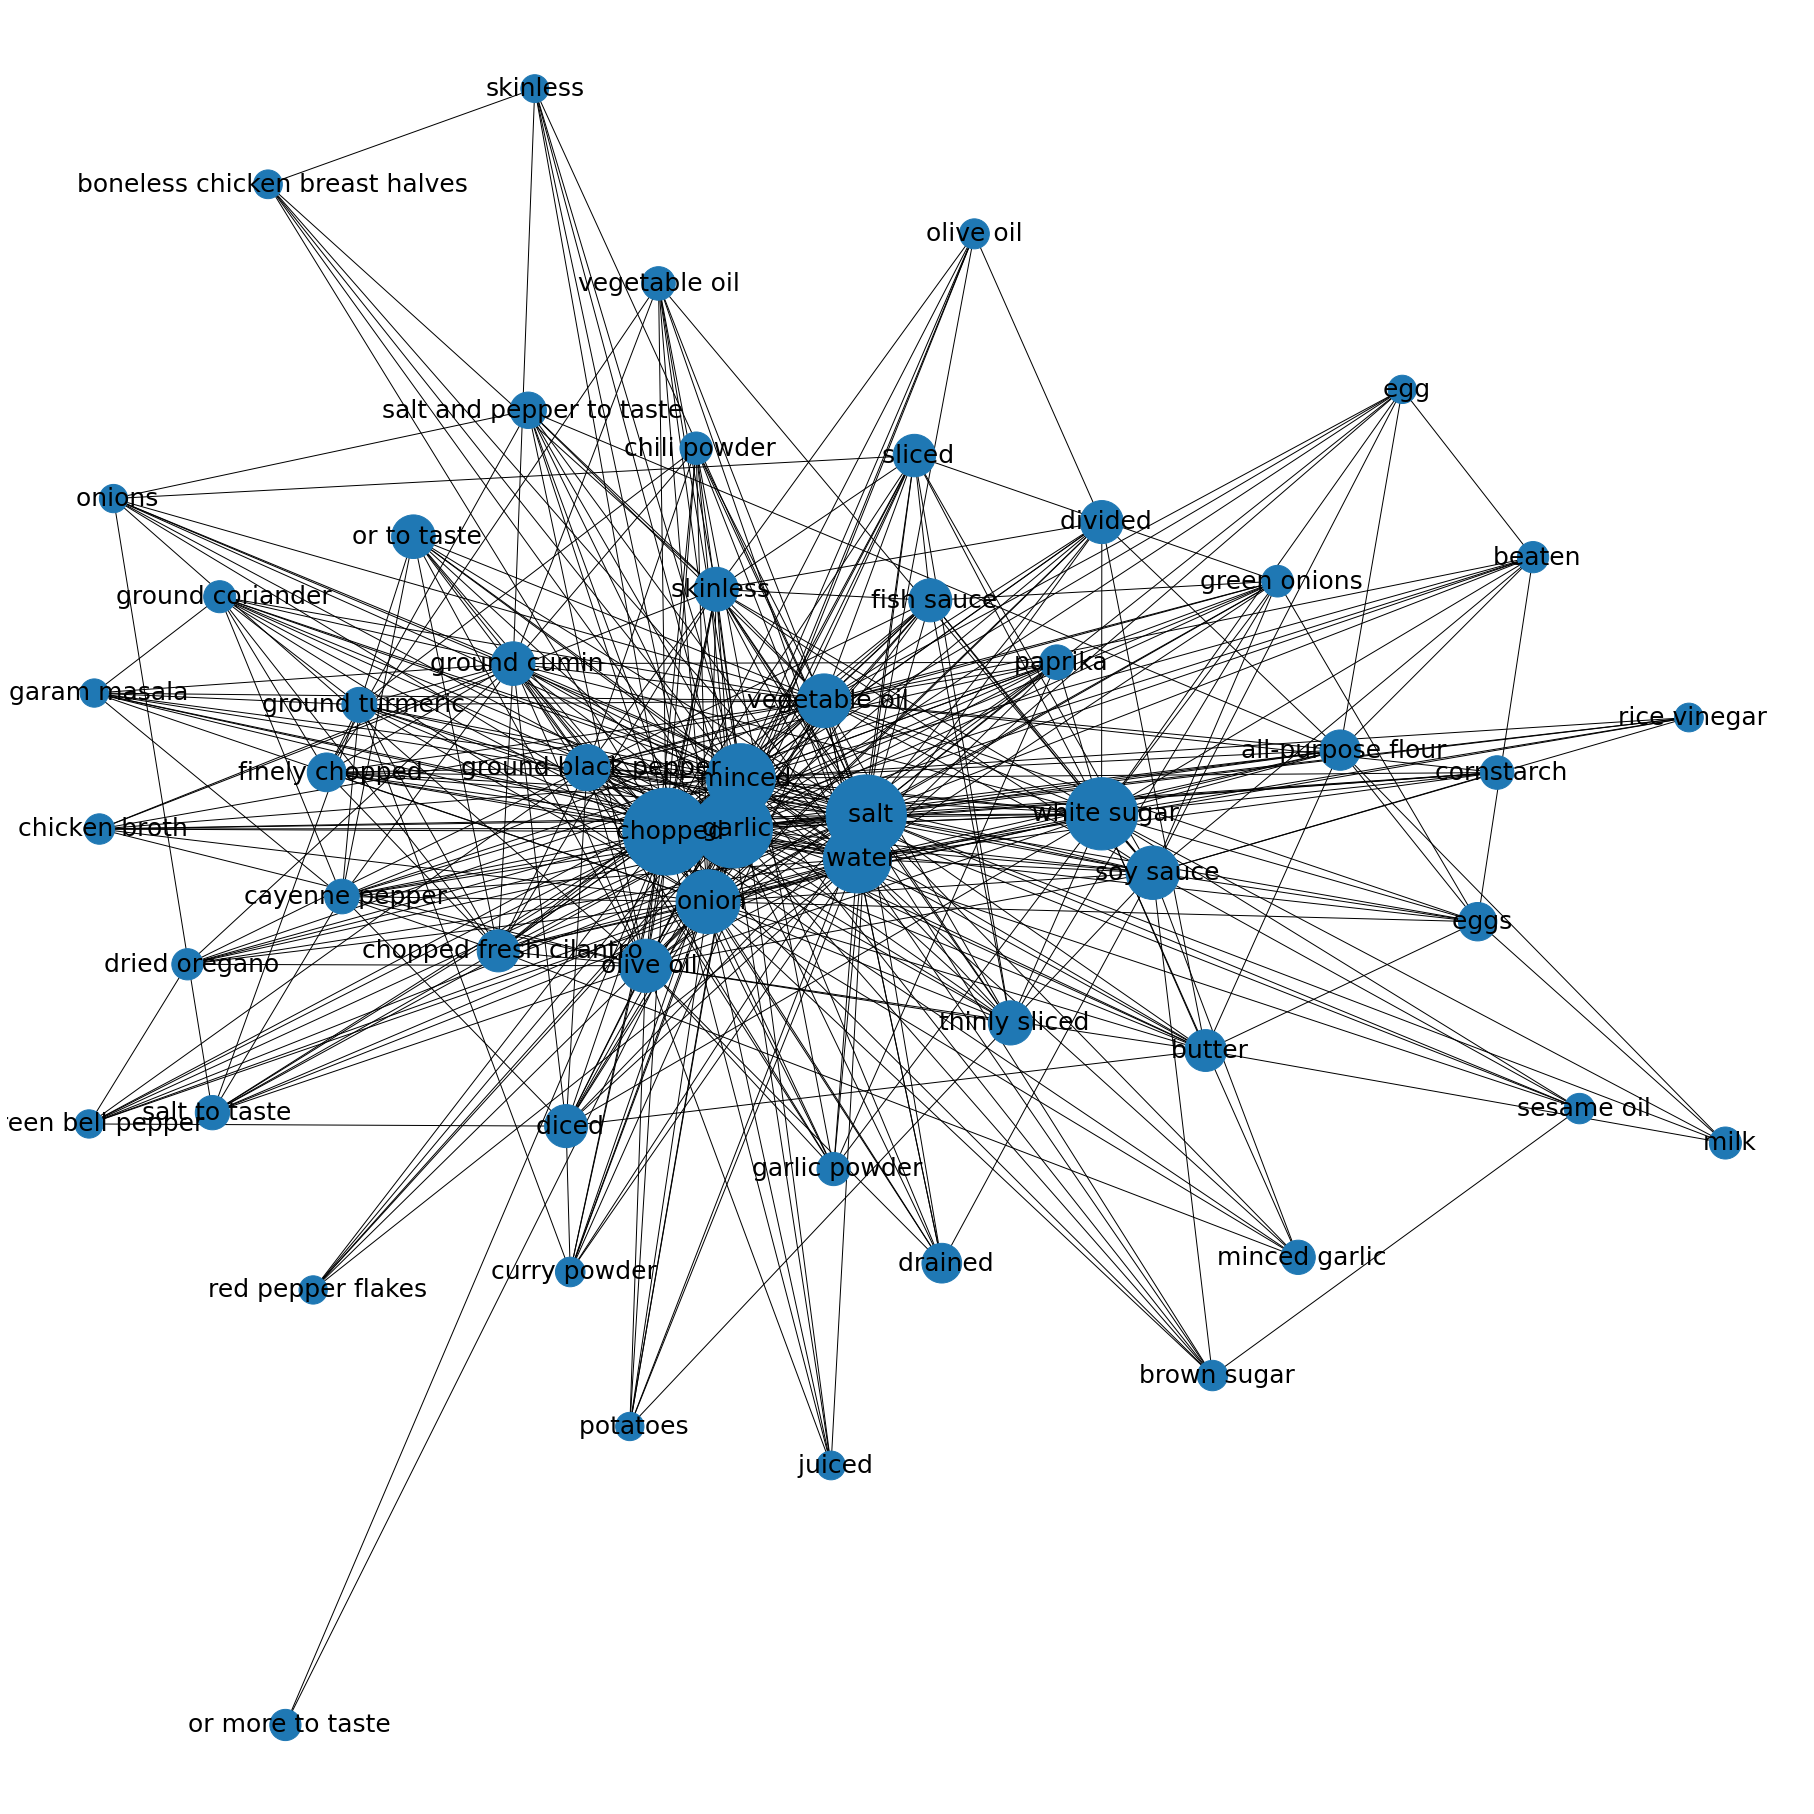

In [6]:
# Plot the network
pos = nx.spring_layout(G, k=0.3*1/np.sqrt(len(G.nodes())), iterations=20)
plt.figure(3, figsize=(25, 25))
nx.draw(G, pos=pos, nodelist=ingredients.keys(), node_size=[v * 25 for v in ingredients.values()])
nx.draw_networkx_labels(G, pos=pos, font_size= 25)
plt.show()
#nx.draw(G)